In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
police_killings = pd.read_csv("police_killings.csv",encoding="ISO-8859-1")
print(police_killings.head())

                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \
0            Clearview Ln     Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr     Pineville    LA    ...                0.5   
2    22nd Ave and 56th St       Kenosha    WI    ...               16.8   
3       3000 Seminole Ave    South Gate    CA    ...               98.8   
4          364 Hiwood Ave  Munroe Falls    OH    ...                1.7   

   p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
0     28375   51367.0   

In [2]:
count=police_killings["raceethnicity"].value_counts()
print(count)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


([<matplotlib.axis.XTick at 0x7efcba789a90>,
 <a list of 6 Text xticklabel objects>)

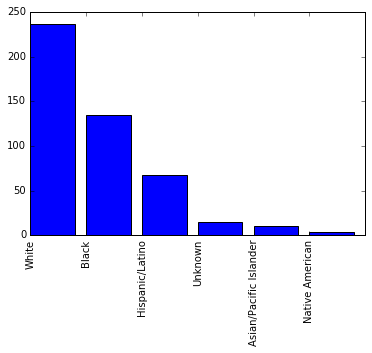

In [3]:
plt.bar(range(6), count)
plt.xticks(range(6), count.index, rotation="vertical")

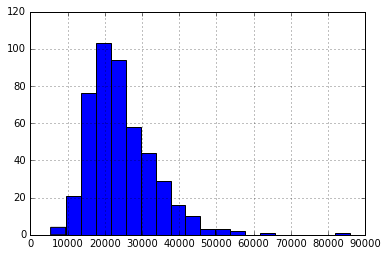

In [4]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).hist(bins=20)


In [5]:
police_killings["p_income"][police_killings["p_income"]!="-"].astype(float).median()

22348.0

Income breakdown
According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make sweeping conclusions.


In [6]:
state_pop = pd.read_csv("state_population.csv")
counts = police_killings["state_fp"].value_counts()

states = pd.DataFrame({"STATE": counts.index, "shootings":counts})
states = pd.merge(state_pop, states, on="STATE")
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]
#states.sort(columns="rate").head()
states.sort("rate")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
37,40,1,2,42,Pennsylvania,12802503,10112229,79.0,7,12.802503,0.546768
15,40,2,4,19,Iowa,3123899,2395103,76.7,2,3.123899,0.640226
32,40,1,2,36,New York,19795791,15584974,78.7,13,19.795791,0.656705
21,40,1,1,25,Massachusetts,6794422,5407335,79.6,5,6.794422,0.735898
29,40,1,1,33,New Hampshire,1330608,1066610,80.2,1,1.330608,0.751536
19,40,1,1,23,Maine,1329328,1072948,80.7,1,1.329328,0.752260
13,40,2,3,17,Illinois,12859995,9901322,77.0,11,12.859995,0.855366
34,40,2,3,39,Ohio,11613423,8984946,77.4,10,11.613423,0.861073
45,40,2,3,55,Wisconsin,5771337,4476711,77.6,5,5.771337,0.866350


In [7]:
police_killings["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
WA    11
NJ    11
IL    11
LA    11
OH    10
MD    10
MO    10
NC    10
MI     9
VA     9
SC     9
OR     8
IN     8
AL     8
PA     7
KY     7
NE     6
KS     6
MS     6
MN     6
TN     6
NM     5
MA     5
WI     5
UT     5
ID     4
HI     4
AR     4
NV     3
AK     2
WV     2
MT     2
IA     2
DE     2
CT     1
NH     1
WY     1
DC     1
ME     1
Name: state, dtype: int64

In [19]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
t = (police_killings["share_white"] != "-") & (police_killings["share_black"] != "-") & (police_killings["share_hispanic"] != "-")
pk = police_killings[t]
pk["share_white"].astype(float)
pk["share_black"].astype(float)
pk["share_hispanic"].astype(float)

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].astype(float).mean()


pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [18]:
hs[columns].astype(float).mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64